# Lecture 19: Function Interpolation

## Lagrange interpolation
Classical polynomial interpolation uses Lagrange basis polynomials.
Given a set of $N$ interpolation points $x_i$ we construct the basis functions

$$
\ell_j(x) = \prod_{k=1, k\neq j}^N \frac{x - x_k}{x_j-x_k}
$$

which satisfy

$$
\ell_j(x_k) = \delta_{jk}.
$$

Then the interpolation polynomial through the points $f_j = f(x_j)$ becomes

$$
P(x) = \sum_{j=1}^N f_j\, \ell_j(x)
$$

which interpolates the function values:
$$
P(x_k) = \sum_{j=1}^N f_j\, \underbrace{\ell_j(x_k)}_{=\delta_{jk}} = f_k.
$$

In [27]:
using Interact

using PyPlot
PyPlot.svg(true);

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-12583422872456876930\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-17953494733035360595\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/assetserver/ea8282a8d723f49a68b1d36bce2394d3b9f3b531-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-12583422872456876930\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

In [2]:
function lagrange_basis(xs)
    """ Return Lagrange basis functions for the vector of
    interpolation points xs
    """
    N = length(xs)
    ℓs = []
    
    for j=1:N
        function ℓ(x)
            xs_no_j = xs[vcat(1:j-1, j+1:N)]
            return prod(x .- xs_no_j)/prod(xs[j] .- xs_no_j)
        end
        
        push!(ℓs, ℓ)
    end
    
    return ℓs
end

lagrange_basis (generic function with 1 method)

In [7]:
xk = LinRange(0, 1, 11)
ℓs = lagrange_basis(xk);

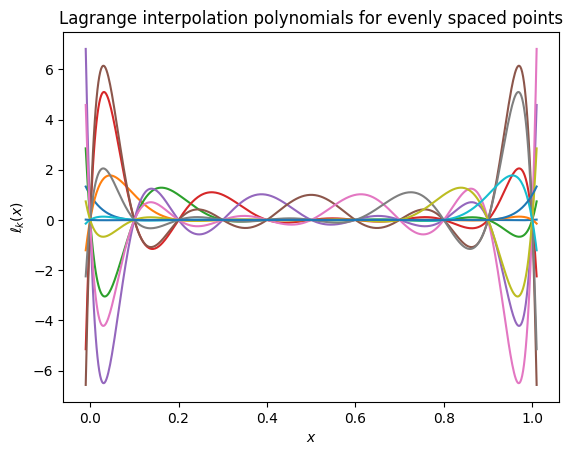

PyObject Text(27.400000000000013, 0.5, '$ℓ_k(x)$')

In [10]:
figure()
xs = LinRange(-0.01, 1.01, 500)

for ℓ in ℓs
    plot(xs, ℓ.(xs))
end

title("Lagrange interpolation polynomials for evenly spaced points")
xlabel(L"x")
ylabel(L"ℓ_k(x)")

In [11]:
# Let's interpolate a simple function
f = sin.(xk*2π)

11-element Array{Float64,1}:
  0.0                   
  0.5877852522924731    
  0.9510565162951535    
  0.9510565162951536    
  0.5877852522924732    
  1.2246467991473532e-16
 -0.587785252292473     
 -0.9510565162951535    
 -0.9510565162951536    
 -0.5877852522924734    
 -2.4492935982947064e-16

In [12]:
function lagrange_interp(x, f, ℓs)
    """ Interpolate the function values f using the basis
    functions ℓs at the point x.
    """
    S = 0.0
    for (fx, ℓ) in zip(f, ℓs)
        S += fx*ℓ(x)
    end
    
    return S
end

lagrange_interp (generic function with 1 method)

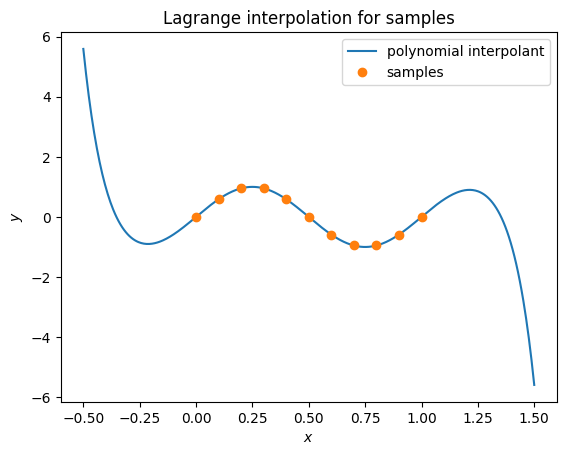

PyObject <matplotlib.legend.Legend object at 0x7f2508312828>

In [16]:
figure()
xs = LinRange(-0.5, 1.5, 500)

li(x) = lagrange_interp(x, f, ℓs)
plot(xs, li.(xs), label="polynomial interpolant")
plot(xk, f, "o", label="samples")

title("Lagrange interpolation for samples")
xlabel(L"x")
ylabel(L"y")
legend()

## Classical interpolation does not converge for $N\rightarrow\infty$

In [18]:
# Runge's function
fun(x) = 1/(1 + 25x^2)

fun (generic function with 1 method)

In [ ]:
fig, ax = subplots()

xs = LinRange(-1, 1, 500)
fxs = fun.(xs)

@manipulate for N=slider(2:30, value=2, label="N")
    withfig(fig, clear=false) do
        ax.cla()
        
        ax.plot(xs, fxs, label="Runge's function")

        xks_N = LinRange(-1, 1, N)
        ℓN = lagrange_basis(xks_N)

        f_xks_N = fun.(xks_N)

        li(x) = lagrange_interp(x, f_xks_N, ℓN)

        ax.plot(xks_N, f_xks_N, "o")
        ax.plot(xs, li.(xs), label="N=$(N) interpolant")
        
        ax.set_ylim(0, 1.3)


        ax.legend()
        ax.set_xlabel(L"x")
        ax.set_ylabel(L"f(x)")
    end
end

## Chebyshev polynomial interpolation

The Chebyshev polynomials are defined by

$$
T_n(x) = \cos(n \arccos(x)) = \sum_{k=0}^{\lfloor{n/2}\rfloor} {{n}\choose{2k}} (x^2 -1)^k x^{n-2k},
$$

and can be used to interpolate arbitrary functions on the interval $[-1,1]$.

In [ ]:
function chebyshev_basis(n)
    """ Return the n first Chebyshev polynomials
    """
    chebs = []
    for i=1:n
        function cheb(x)
            f = 0.0
            for k=0:Int64(floor(i/2))
                f += binomial(i, 2k) * (x^2 - 1)^k * x^(n-2k)
            end
            
            return f
        end
        
        push!(chebs, cheb)
    end
    
    return chebs
end

In [ ]:
chebs = chebyshev_basis(5);

In [ ]:
figure()
xs = LinRange(-1, 1., 500)

for Tn in chebs
    plot(xs, Tn.(xs))
end

title("Chebyshev polynomials")
xlabel(L"x")
ylabel(L"T_n(x)")

## Chebyshev transform

Using the inner product 
$$
\langle f, g\rangle = \int_{-1}^1 \frac{f(x) g(x)}{\sqrt{1-x^2}} dx
$$

we find the orthogonality relations
$$
\langle T_n, T_m \rangle = \frac{\pi}{2} \delta_{nm}.
$$

Assuming that a Chebyshev expansion exists for a function $f(x)$:

$$
f(x) = \sum_{n=0}^\infty C_n T_n(x),
$$

we find for the coefficients

$$
C_n = \frac{2}{\pi}  \int_{-1}^1 \frac{f(x) T_n(x)}{\sqrt{1-x^2}} dx.
$$

Restricting to the first $$N$$ terms we find the Chebyshev interpolant

$$
f^{Cheb}(x) = \sum_{n=0}^{N-1} C_n T_n(x),
$$

which is the unique interpolation polynomial of degree $N$ that agrees with $f(x)$
at the Chebyshev points $x_n = \cos (n\pi/N)$.

In [ ]:
# Lagrange basis polynomials for the Chebyshev points

xk_cheb = cos.((0:9)*π/10)
ℓs_cheb = lagrange_basis(xk_cheb);

In [ ]:
figure()
xs = LinRange(-1., 1., 500)

for ℓ in ℓs_cheb
    plot(xs, ℓ.(xs))
end

title("Lagrange interpolation polynomials for Chebyshev points")
xlabel(L"x")
ylabel(L"ℓ_k(x)")

In [ ]:
fig, ax = subplots()

xs = LinRange(-1, 1, 500)
fxs = fun.(xs)

@manipulate for N=slider(1:30, value=1, label="N")
    withfig(fig, clear=false) do
        ax.cla()
        
        ax.plot(xs, fxs, label="Runge's function")

        xks_N = cos.((0:N)*π/N) # Chebyshev points
        ℓN = lagrange_basis(xks_N)

        f_xks_N = fun.(xks_N)

        li(x) = lagrange_interp(x, f_xks_N, ℓN)

        ax.plot(xks_N, f_xks_N, "o")
        ax.plot(xs, li.(xs), label="N=$(N) Chebyshev interpolant")
        
        ax.set_ylim(0, 1.3)


        ax.legend()
        ax.set_xlabel(L"x")
        ax.set_ylabel(L"f(x)")
    end
end